In [6]:
# Import libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from scipy import stats

In [7]:
# Read the file "Advertising.csv" as a dataframe

df = pd.read_csv("Advertising.csv",index_col=0)

In [8]:
# Select a subdataframe of predictors

X = df.drop(['sales'],axis=1)

# Select the response variable

y = df['sales']

In [9]:
#Fit a linear regression model, make sure to set normalize=True

lreg = LinearRegression(normalize=True)

lreg.fit(X, y)

LinearRegression(normalize=True)

In [10]:
coef_dict = dict(zip(df.columns[:-1], np.transpose(lreg.coef_)))
predictors,coefficients = list(zip(*sorted(coef_dict.items(),key=lambda x: x[1])))

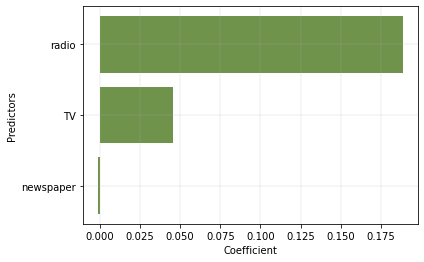

In [11]:
# Use the helper code below to visualise your coefficients

fig, ax = plt.subplots()
ax.barh(predictors,coefficients, align='center',color="#336600",alpha=0.7)
ax.grid(linewidth=0.2)
ax.set_xlabel("Coefficient")
ax.set_ylabel("Predictors")
plt.show()

In [12]:
# Helper function
# t statistic calculator
def get_t(arr):
    means = np.abs(arr.mean(axis=0))
    stds = arr.std(axis=0)
    return np.divide(means,stds)#,where=stds!=0)

In [13]:
# We now bootstrap for numboot times to find the distribution for the coefficients
coef_dist = []
numboot = 1000
for i in range(numboot):
    df_new = df.sample(frac=1,replace=True)
    X = df_new.drop('sales',axis=1)
    y = df_new['sales']
    # Dont forget to normalize

    lreg = LinearRegression(normalize=True)
    lreg.fit(X, y)
    coef_dist.append(lreg.coef_)

coef_dist = np.array(coef_dist)

In [14]:
# We use the helper function from above to find the T-test values

tt = get_t(coef_dist)
n = df.shape[0]

In [15]:
tt_dict = dict(zip(df.columns[:-1], tt))
predictors, tvalues = list(zip(*sorted(tt_dict.items(),key=lambda x:x[1])))

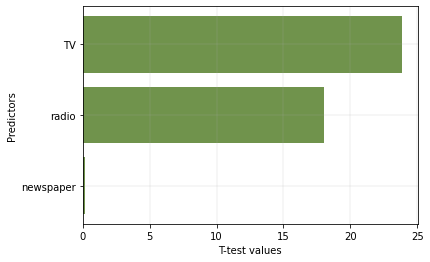

In [16]:
# Use the helper code below to visualise your coefficients
fig, ax = plt.subplots()
ax.barh(predictors,tvalues, align='center',color="#336600",alpha=0.7)
ax.grid(linewidth=0.2)
ax.set_xlabel("T-test values")
ax.set_ylabel("Predictors")
plt.show()

In [17]:
# We now go from t-test values to p values using scipy.stats T-distribution function

pval = stats.t.sf(tt, n-1)*2

# here we use sf i.e 'Survival function' which is 1 - CDF of the t distribution.
# We also multiply by two because its a two tailed test.
# Please refer to lecture notes for more information

# Since p values are in reversed order, we find the 'confidence' which is 1-p

conf = 1-pval

In [18]:
conf_dict = dict(zip(df.columns[:-1], conf))
predictors, confs = list(zip(*sorted(conf_dict.items(),key=lambda x:x[1])))

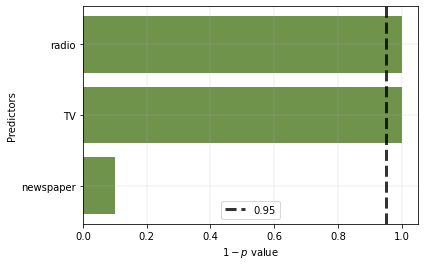

In [19]:
# Use the helper code below to visualise your coefficients
fig, ax = plt.subplots()

ax.barh(predictors,confs, align='center',color="#336600",alpha=0.7)
ax.grid(linewidth=0.2)
ax.axvline(x=0.95,linewidth=3,linestyle='--', color = 'black',alpha=0.8,label = '0.95')
ax.set_xlabel("$1-p$ value")
ax.set_ylabel("Predictors")
ax.legend()
plt.show()

In [20]:
conf

array([1.        , 1.        , 0.09963531])